***
<a name='TOP'>

# <center> Predicting Boston Housing Prices


### Sections:
[`1. Boston Housing Prices Dataset`](#DM)<br>
[`2. Impoting Data and Initial Data Analysis`](#IDIDA)<br>
[`3. Data Visualization`](#VA)<br>
[`4. Linear Model`](#MB)<br>
[`5. Transformed Linear Model - Logarithmic`](#LM)<br>
[`6. Comparing Models`](#CM)<br>
[`7. Total Fit of Better Model`](#TF)<br>
[`End of Notebook`](#bottom)
    
By [Math & physics Fun with Gus](https://mathphysicsfunwithgus.square.site)
***

In [1]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as pl

from scipy import stats
from scipy.stats import norm, skew 

%config InlineBackend.figure_format = 'retina'

# Importing Data #
df = pd.read_csv('/kaggle/input/boston-housing-data/boston_housing.csv')

# Colors
colors = ['lightcoral',
          'deeppink',
          'darkorange',
          'darkviolet',
          'gold',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'cyan']

***
<a name='DM'>
    
# 1. Boston Housing Prices Dataset 
    
The data information below is from
```python
from sklearn.datasets import load_boston
load_boston().DESCR()
```
    
***

**Data Set Characteristics:**  
Number of Instances: 506 
Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information (in order):
- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per \$10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: \$1000(Bk - 0.63)^2$ where Bk is the proportion of black people by town
- **LSTAT**: \% lower status of the population
- **MEDV**: Median value of owner-occupied homes in \$1000's

        Missing Attribute Values: None
        Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
This dataset was taken from the StatLib library which is maintained at `Carnegie Mellon University`.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**Topic**: References
   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
***

    
## 1.1 GOAL: use the data to develop a machine learning model to help with prediction's of housing prices in Boston.

***
<a name='IDIDA'>

# 2. Importing and Initial Data Analysis

In [2]:
# Getting boston housing data from sklearn.datasets
df.rename(columns=str.lower, inplace=True)
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  saleprice  
0       15.3  396.90   4.98       24.0  
1       17.8  396.90   9.14       21.6  
2       17.8  392.83   4.03       34.7  
3       18.7  394.63   2.94       33.4  
4       18.7  396.90   5.33       36.2  
..       ...     ...    ...        ...  
501     21.0  391.99   9.67       22.4  
502     21.0  396.90   9.08       20.6  
503     21.0  396.90   5.64       23.9  
504     21.0  393.45   6.48       22.0  
505     21.0  396.90   7.88       11.9  

[506 rows x 14 columns]

## 2.1 Data Description

In [3]:
round(df.describe().iloc[1:,:], 2)

crim      zn  indus  chas   nox    rm     age    dis    rad     tax  \
mean   3.61   11.36  11.14  0.07  0.55  6.28   68.57   3.80   9.55  408.24   
std    8.60   23.32   6.86  0.25  0.12  0.70   28.15   2.11   8.71  168.54   
min    0.01    0.00   0.46  0.00  0.38  3.56    2.90   1.13   1.00  187.00   
25%    0.08    0.00   5.19  0.00  0.45  5.89   45.02   2.10   4.00  279.00   
50%    0.26    0.00   9.69  0.00  0.54  6.21   77.50   3.21   5.00  330.00   
75%    3.68   12.50  18.10  0.00  0.62  6.62   94.07   5.19  24.00  666.00   
max   88.98  100.00  27.74  1.00  0.87  8.78  100.00  12.13  24.00  711.00   

      ptratio       b  lstat  saleprice  
mean    18.46  356.67  12.65      22.53  
std      2.16   91.29   7.14       9.20  
min     12.60    0.32   1.73       5.00  
25%     17.40  375.38   6.95      17.02  
50%     19.05  391.44  11.36      21.20  
75%     20.20  396.22  16.96      25.00  
max     22.00  396.90  37.97      50.00

## 2.2 Data Types and Null

In [4]:
# checking data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       506 non-null    float64
 1   zn         506 non-null    float64
 2   indus      506 non-null    float64
 3   chas       506 non-null    int64  
 4   nox        506 non-null    float64
 5   rm         506 non-null    float64
 6   age        506 non-null    float64
 7   dis        506 non-null    float64
 8   rad        506 non-null    int64  
 9   tax        506 non-null    int64  
 10  ptratio    506 non-null    float64
 11  b          506 non-null    float64
 12  lstat      506 non-null    float64
 13  saleprice  506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


## 2.3 Seperating Predictors from Response variable

In [5]:
# Predictor variables
X = df.drop('saleprice', axis=1) 

# Response variable
y = df.saleprice

display(X.head(), y.head())

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: saleprice, dtype: float64

***
<a name='VA'> 
    
# 3. Data Visualization
    
    
## 3.1 Amazing Interactive visualization function

In [6]:
# Great Data Analysis function #
def Report(data):
    
    from dataprep.eda import create_report
    report_data = create_report(data)
    
    return report_data

#!pip install dataprep
#Report(df)

## 3.2 Scatter Matrix

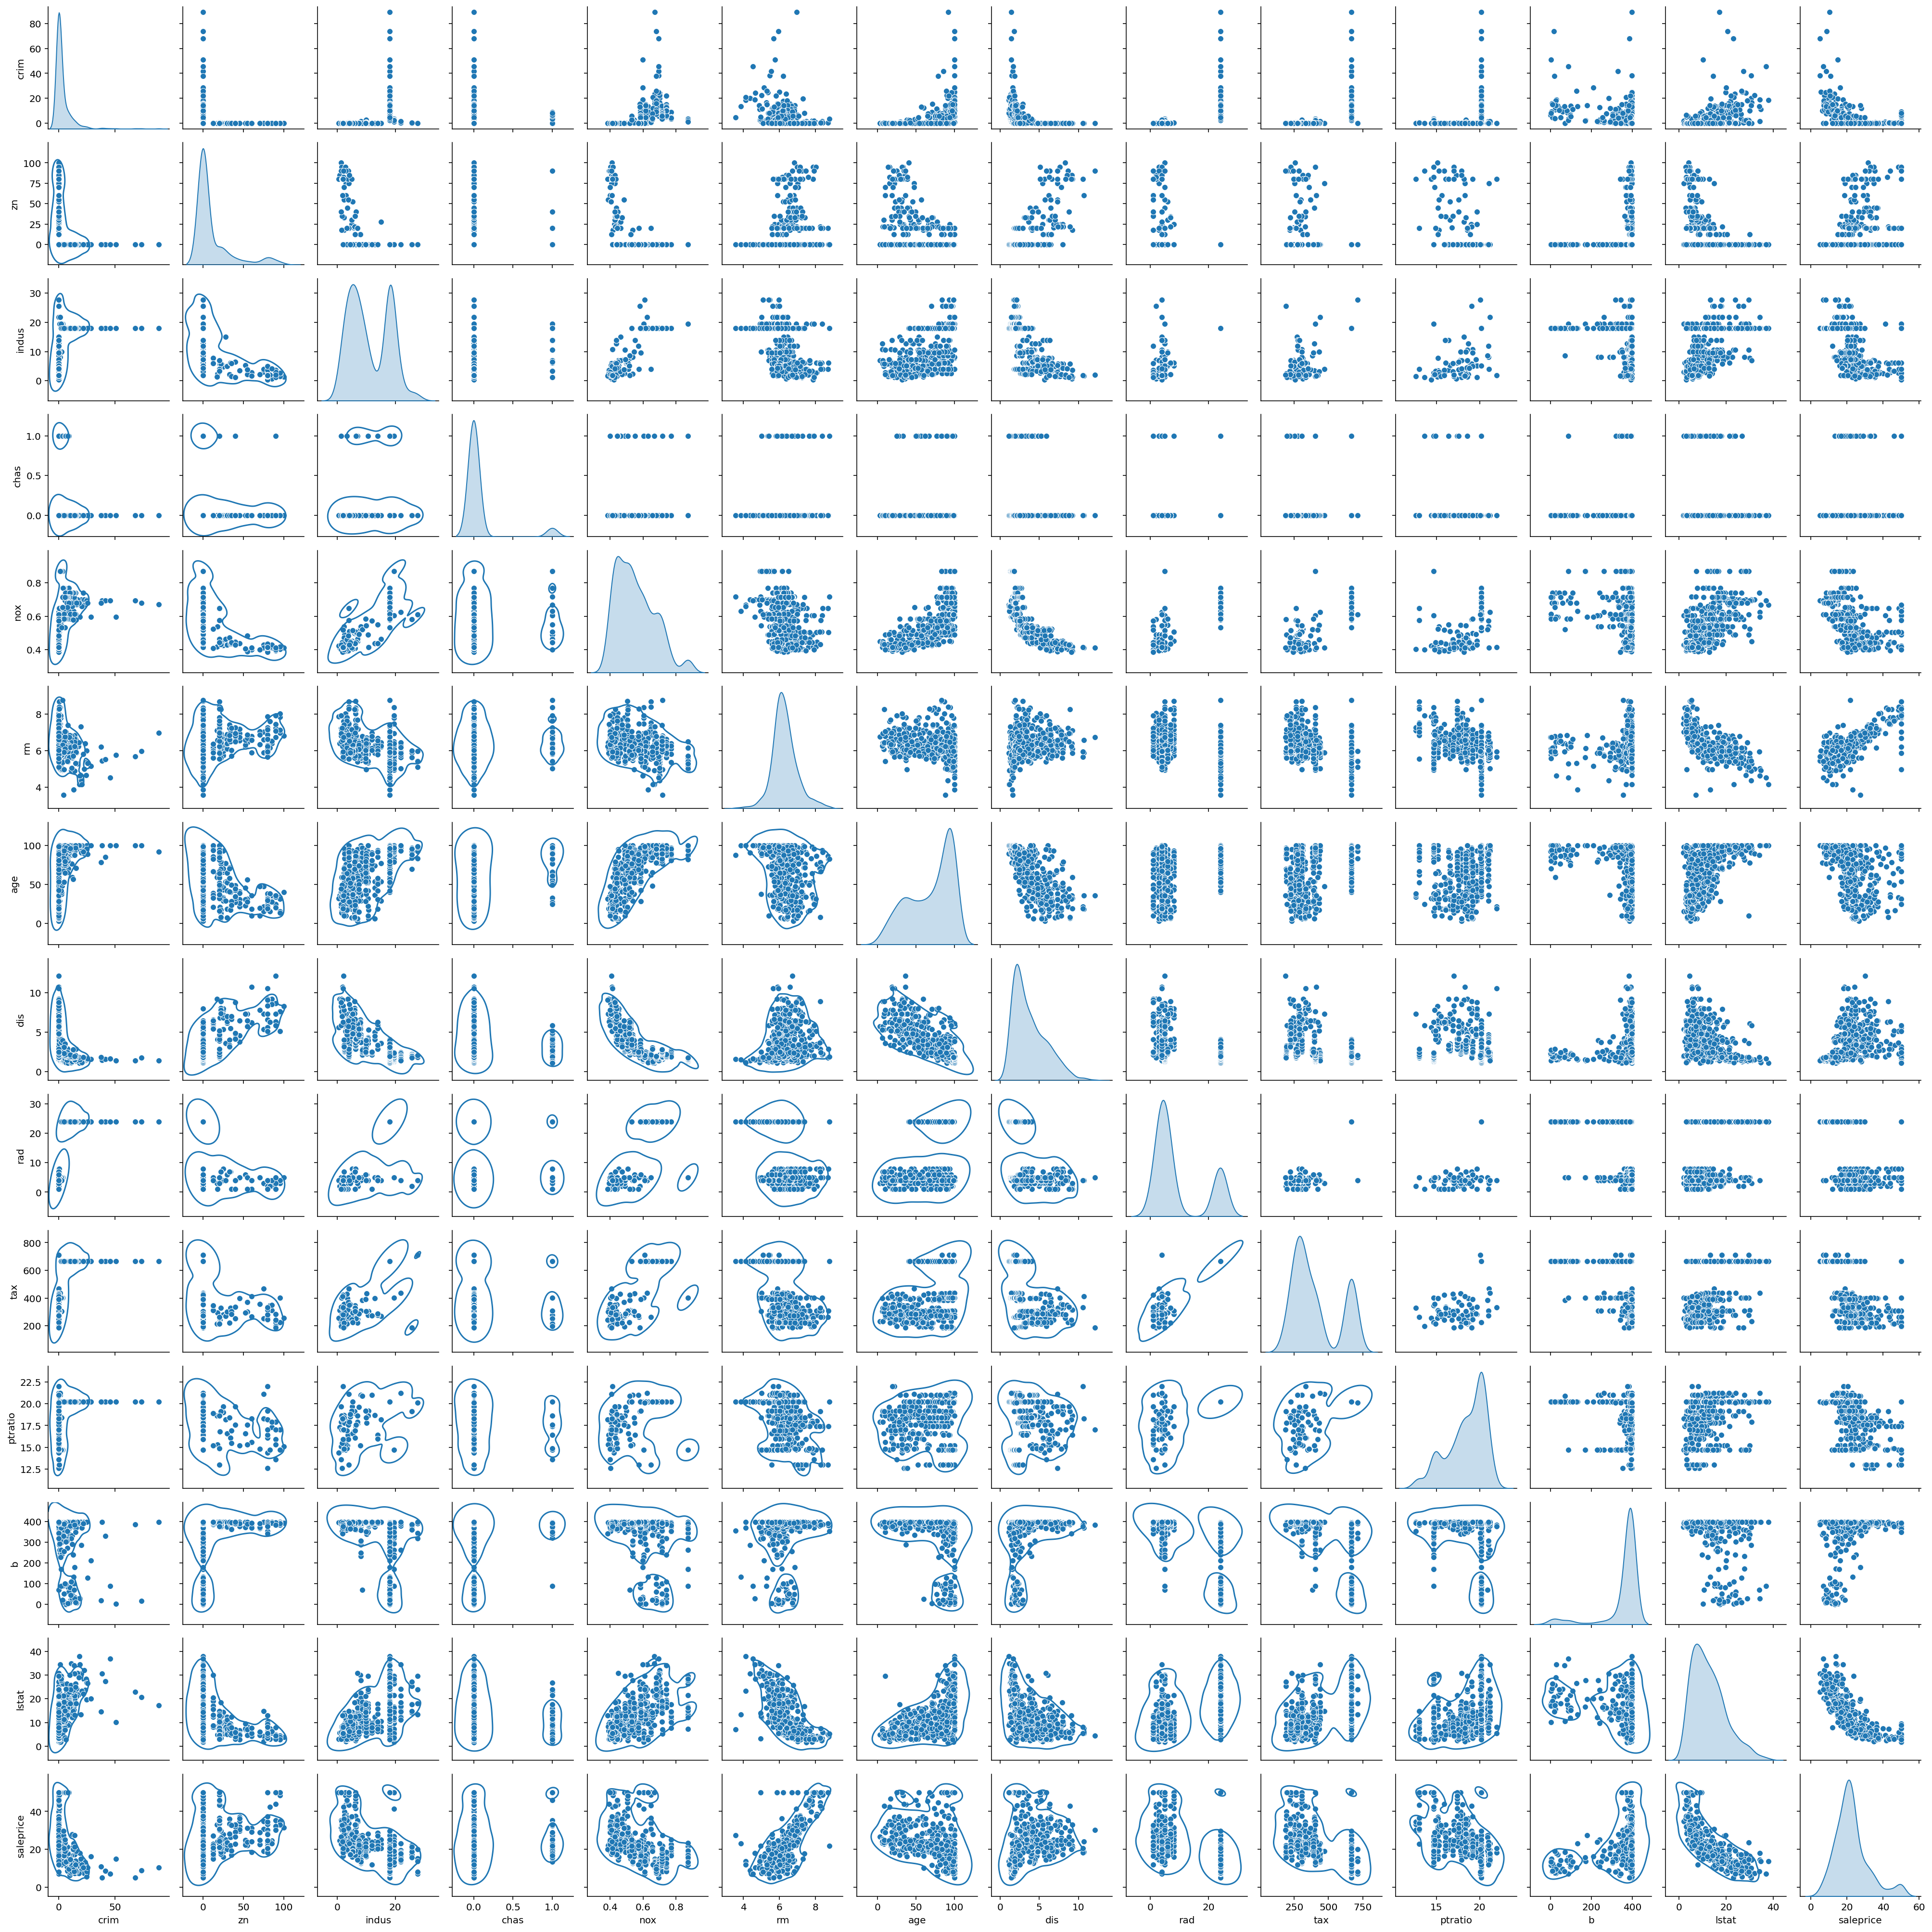

In [7]:
sns.pairplot(df,
             diag_kind='kde',
             height=2).map_lower(sns.kdeplot, 
                                    levels=2)
pl.tight_layout()

## 3.3 Box-Plots

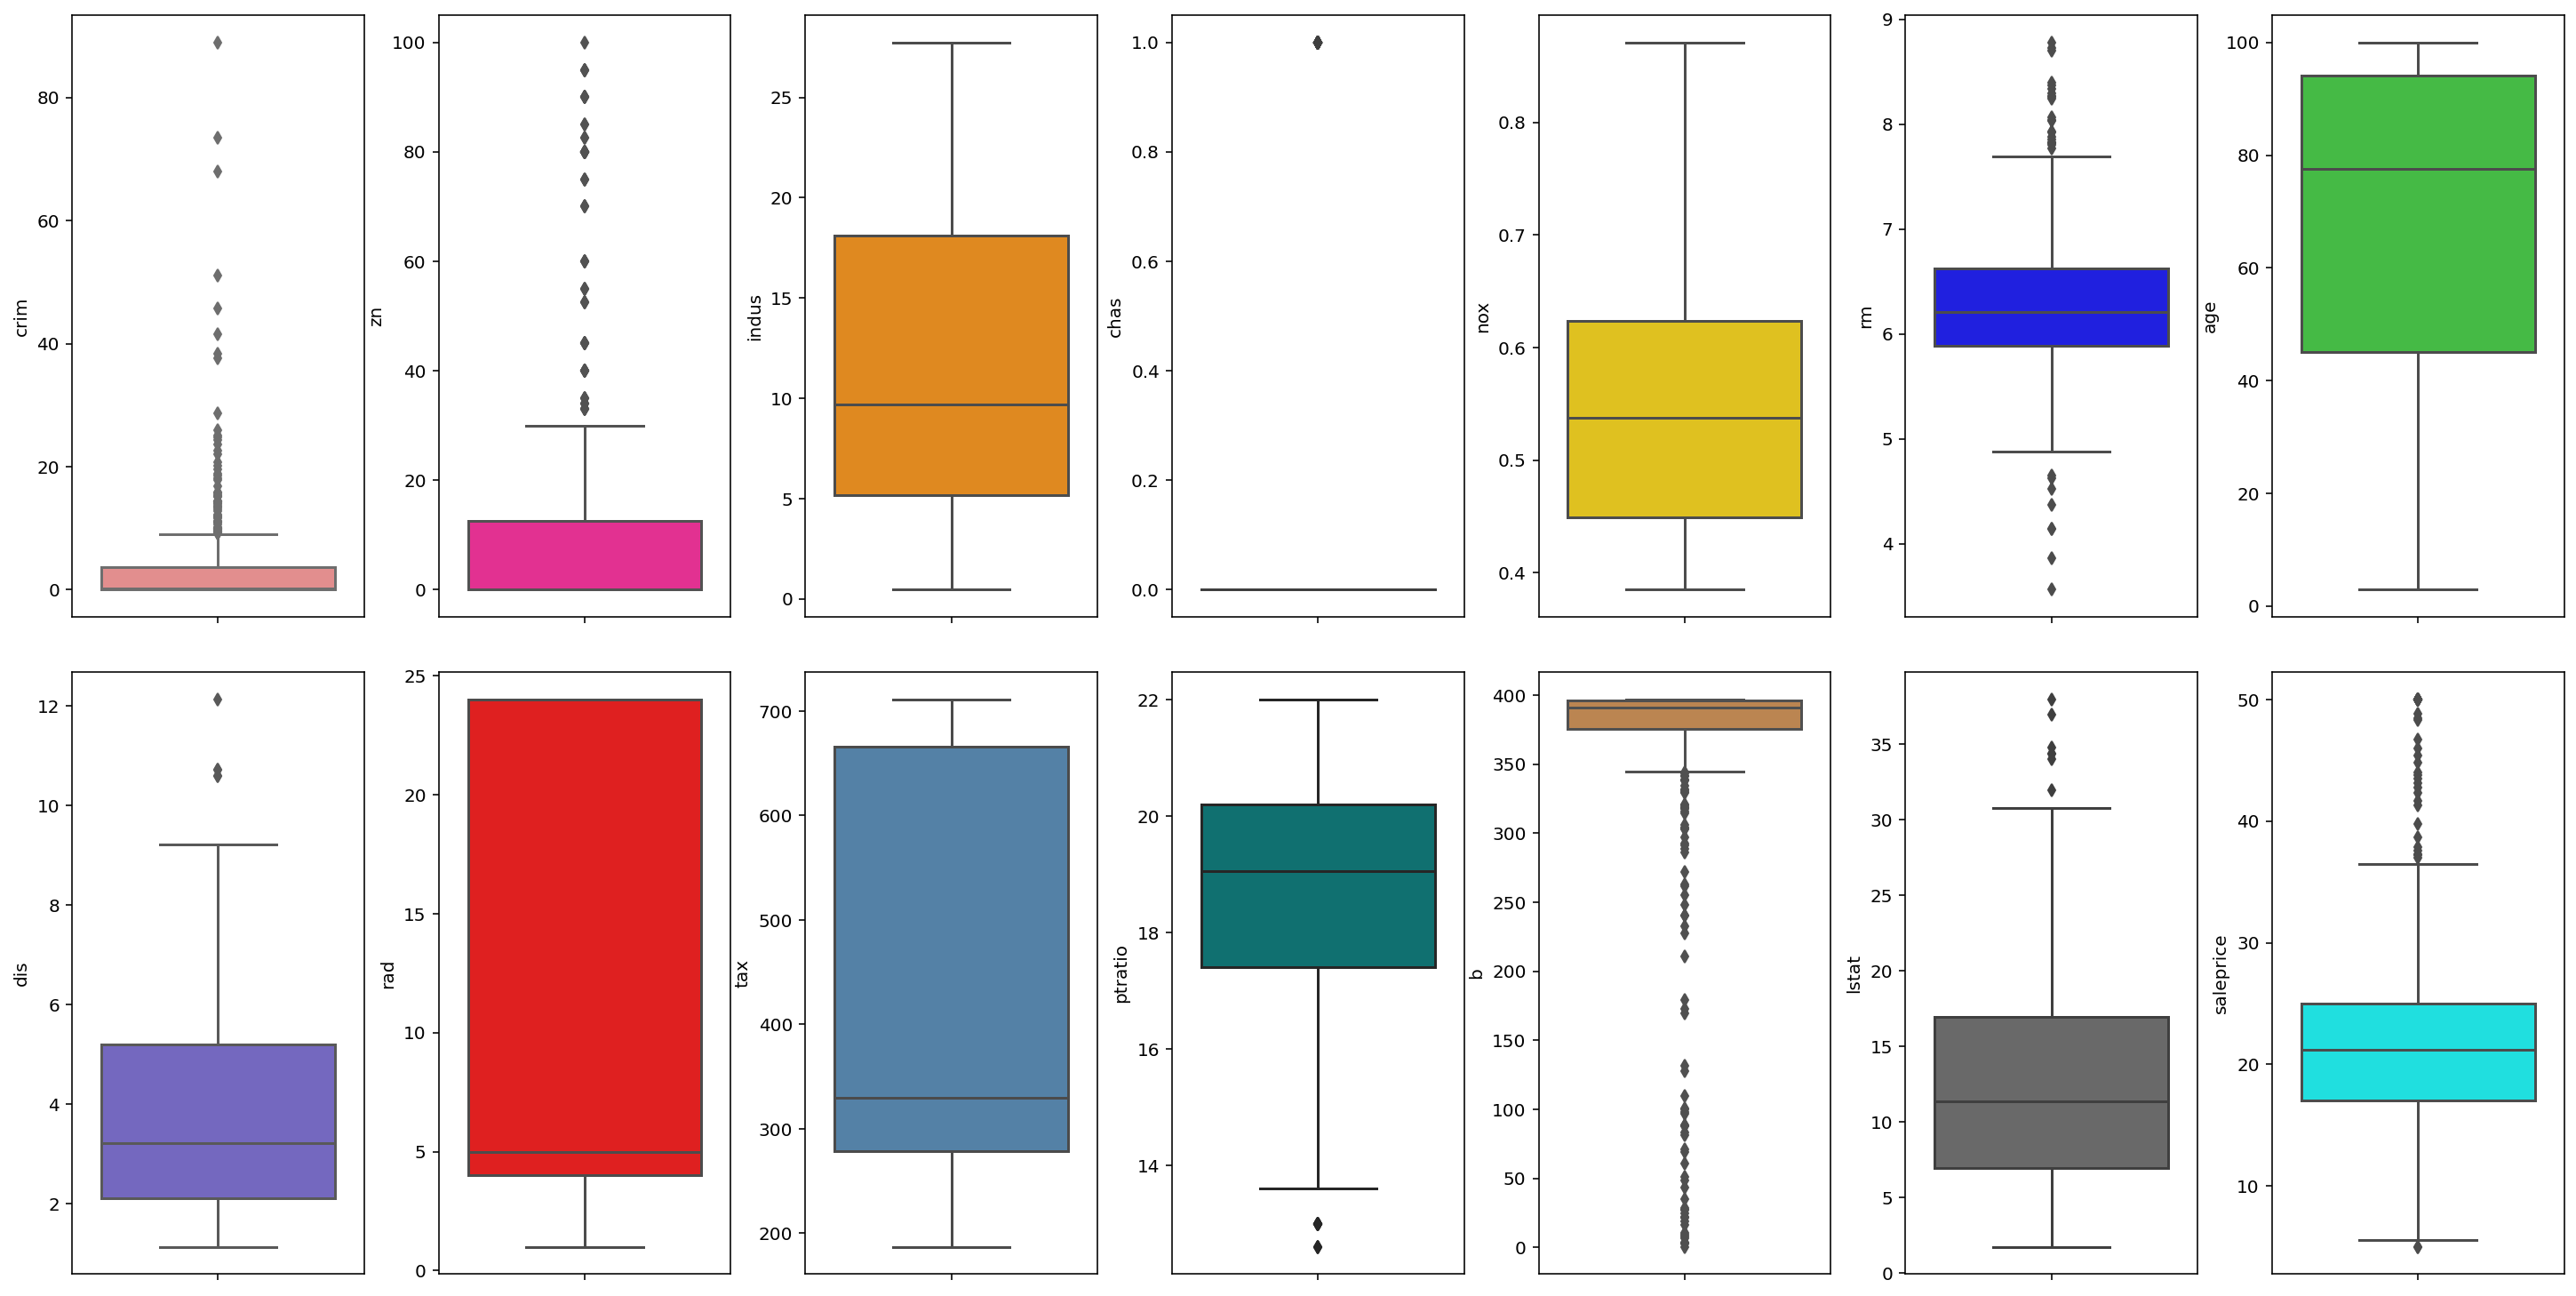

In [8]:
fig, ax = pl.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for col,_ in df.items():
    sns.boxplot(y=col, data=df, ax=ax[i], color=colors[i])
    i += 1
    
pl.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)

## 3.4 Histograms with Kernal Density Estimate

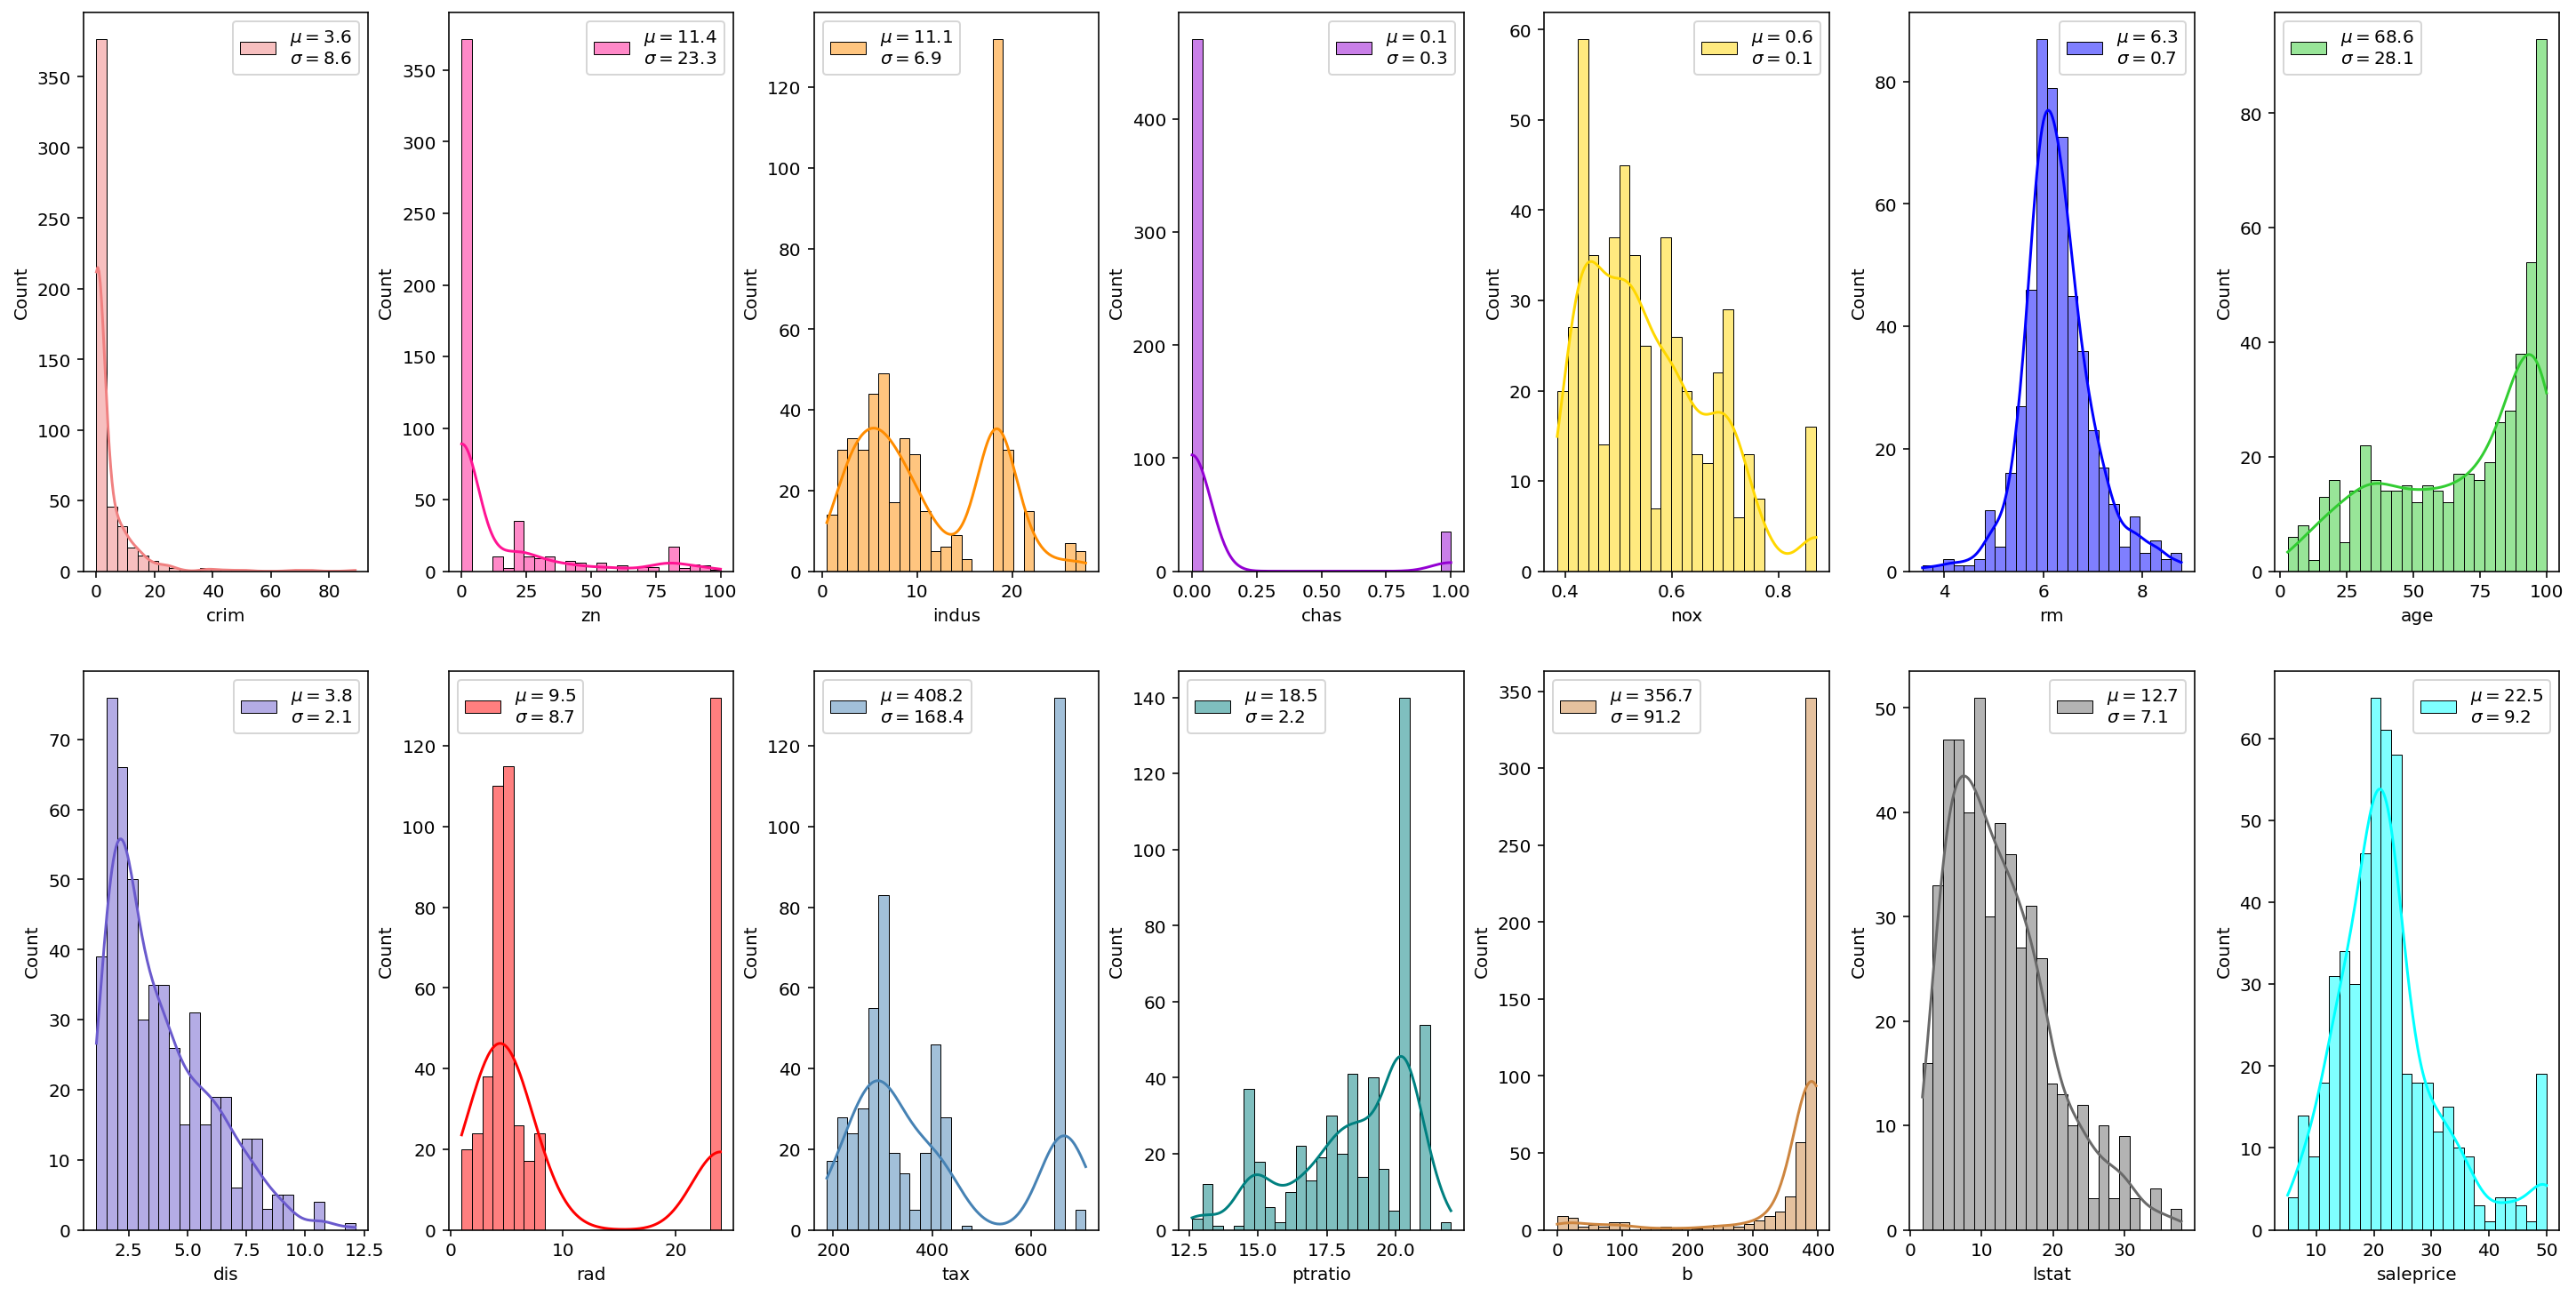

In [9]:
fig, ax = pl.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for _, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 color=colors[i],
                 kde=True,
                 bins=25,
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].legend()
    i += 1
    
pl.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
pl.show()

## 3.5 Regression Plots of Sale Price vs Preditors

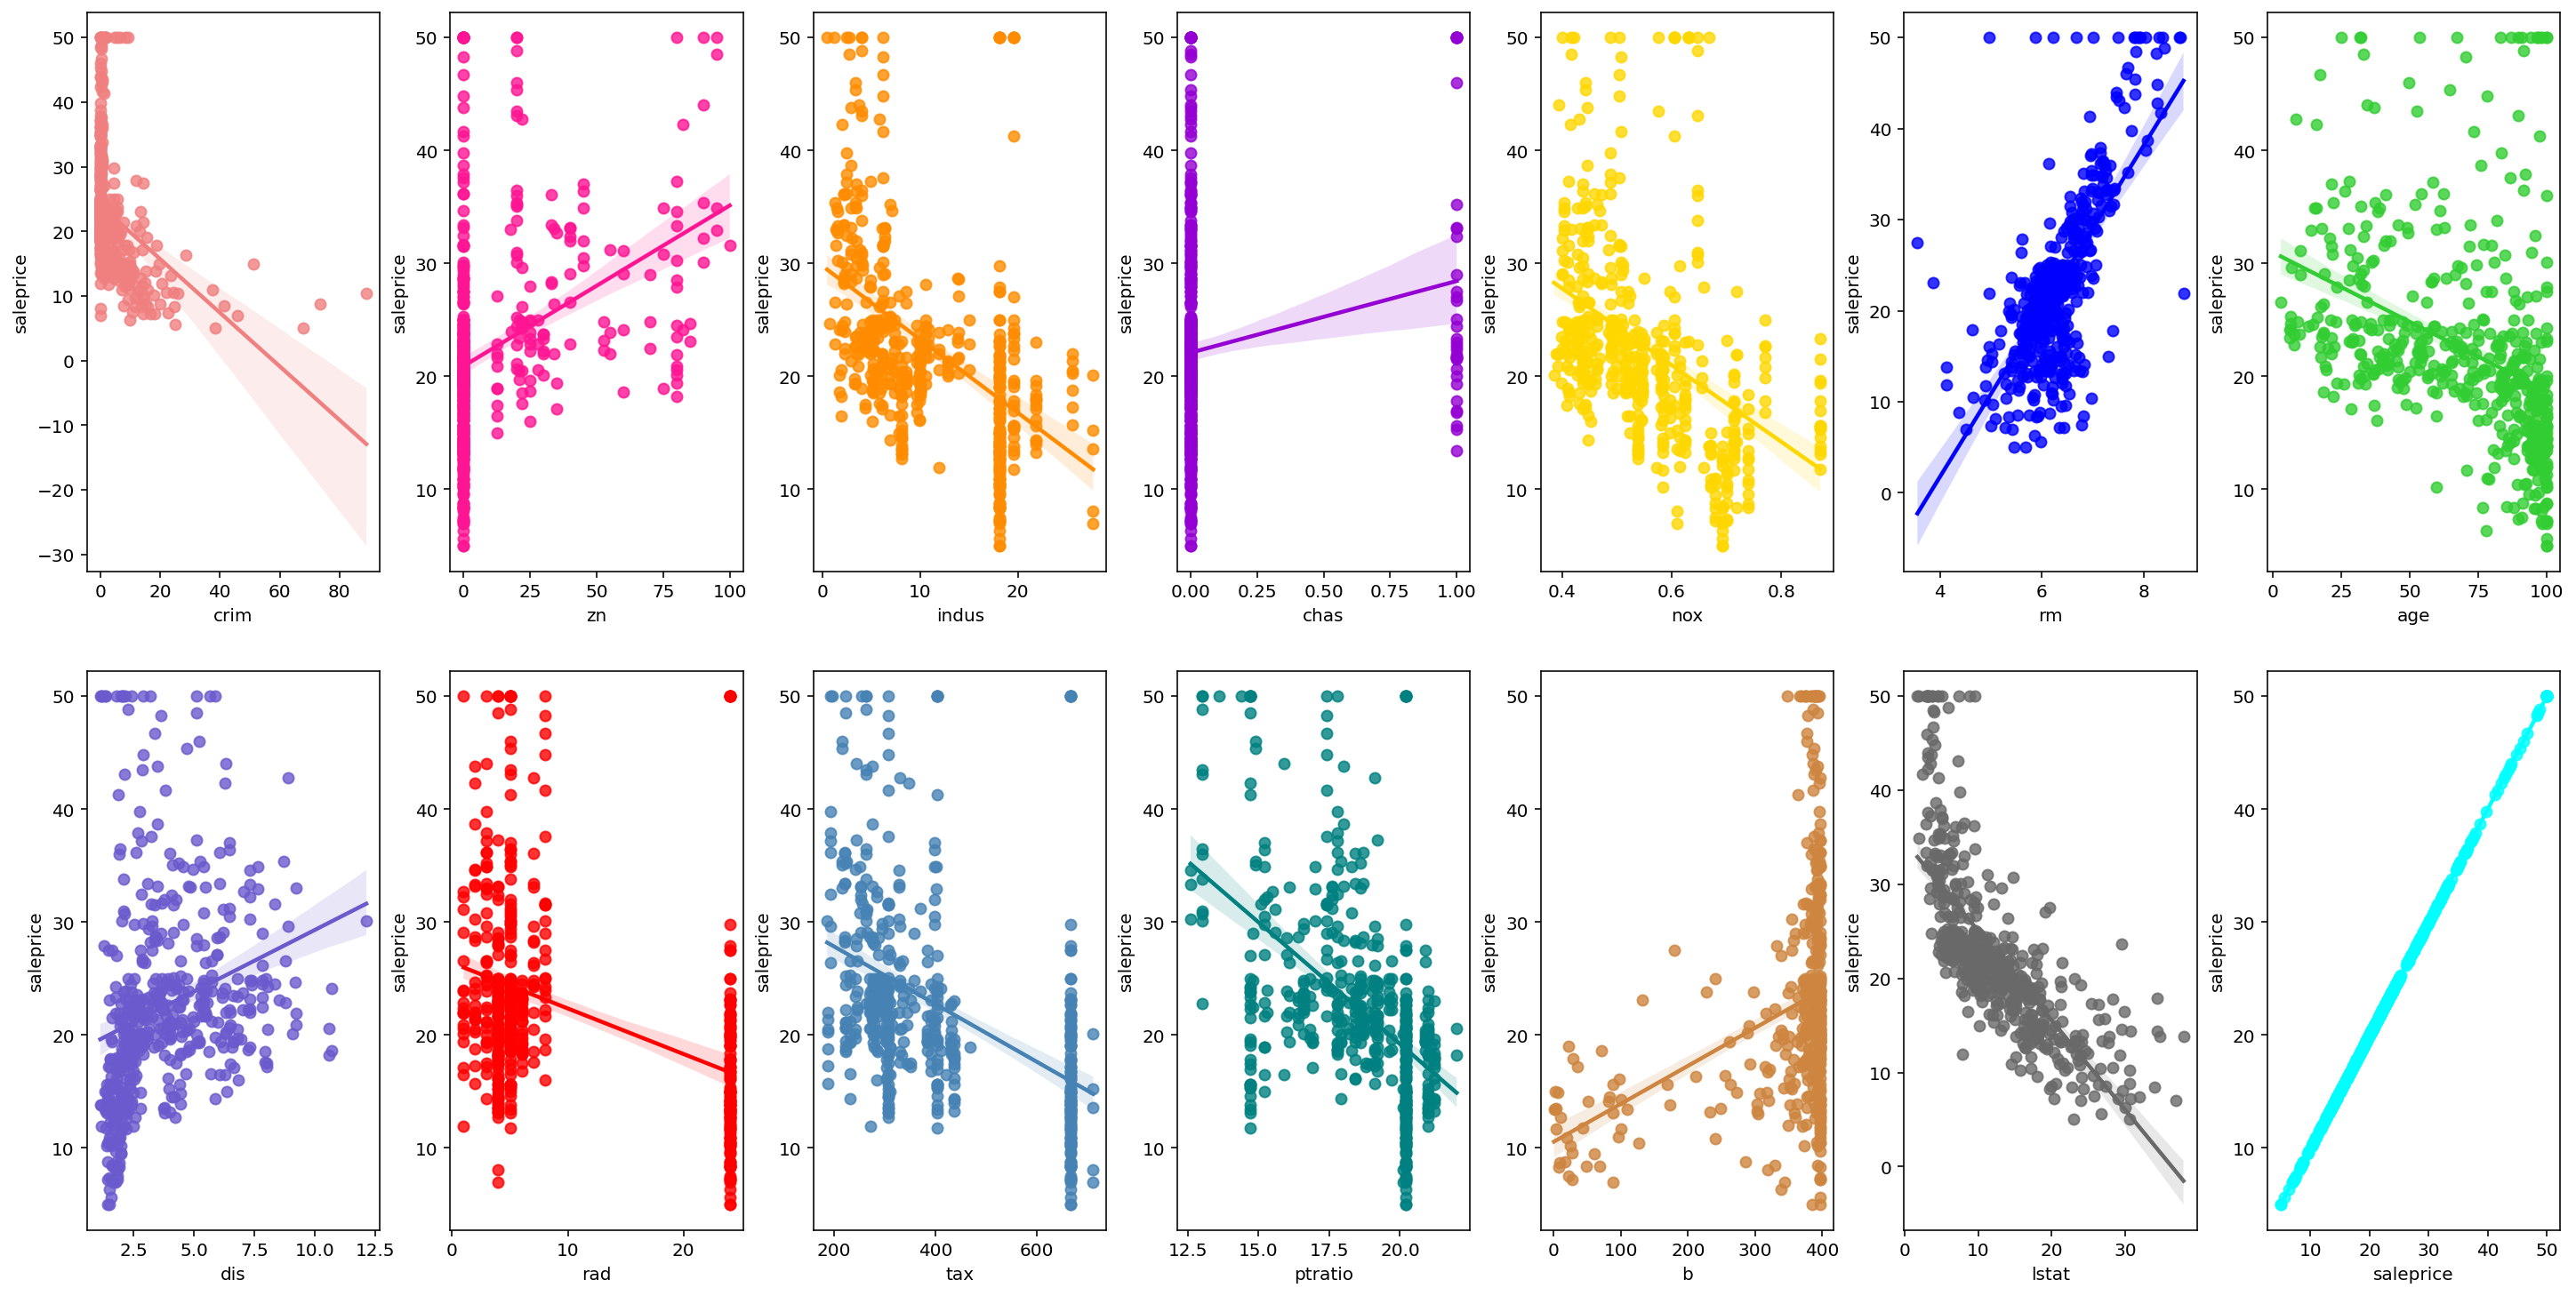

In [10]:
fig, ax = pl.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for col, _ in df.items():
    sns.regplot(y=y, x=df[col], ax=ax[i], color=colors[i])
    i += 1
    
pl.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)

## 3.6 Logarithm Transformation of Sale Price

In [11]:
df["log_saleprice"] = np.log1p(df["saleprice"])

## 3.7 Distribution Comparison of $\log(\texttt{Sale Price})$  vs  $\texttt{Sale Price}$

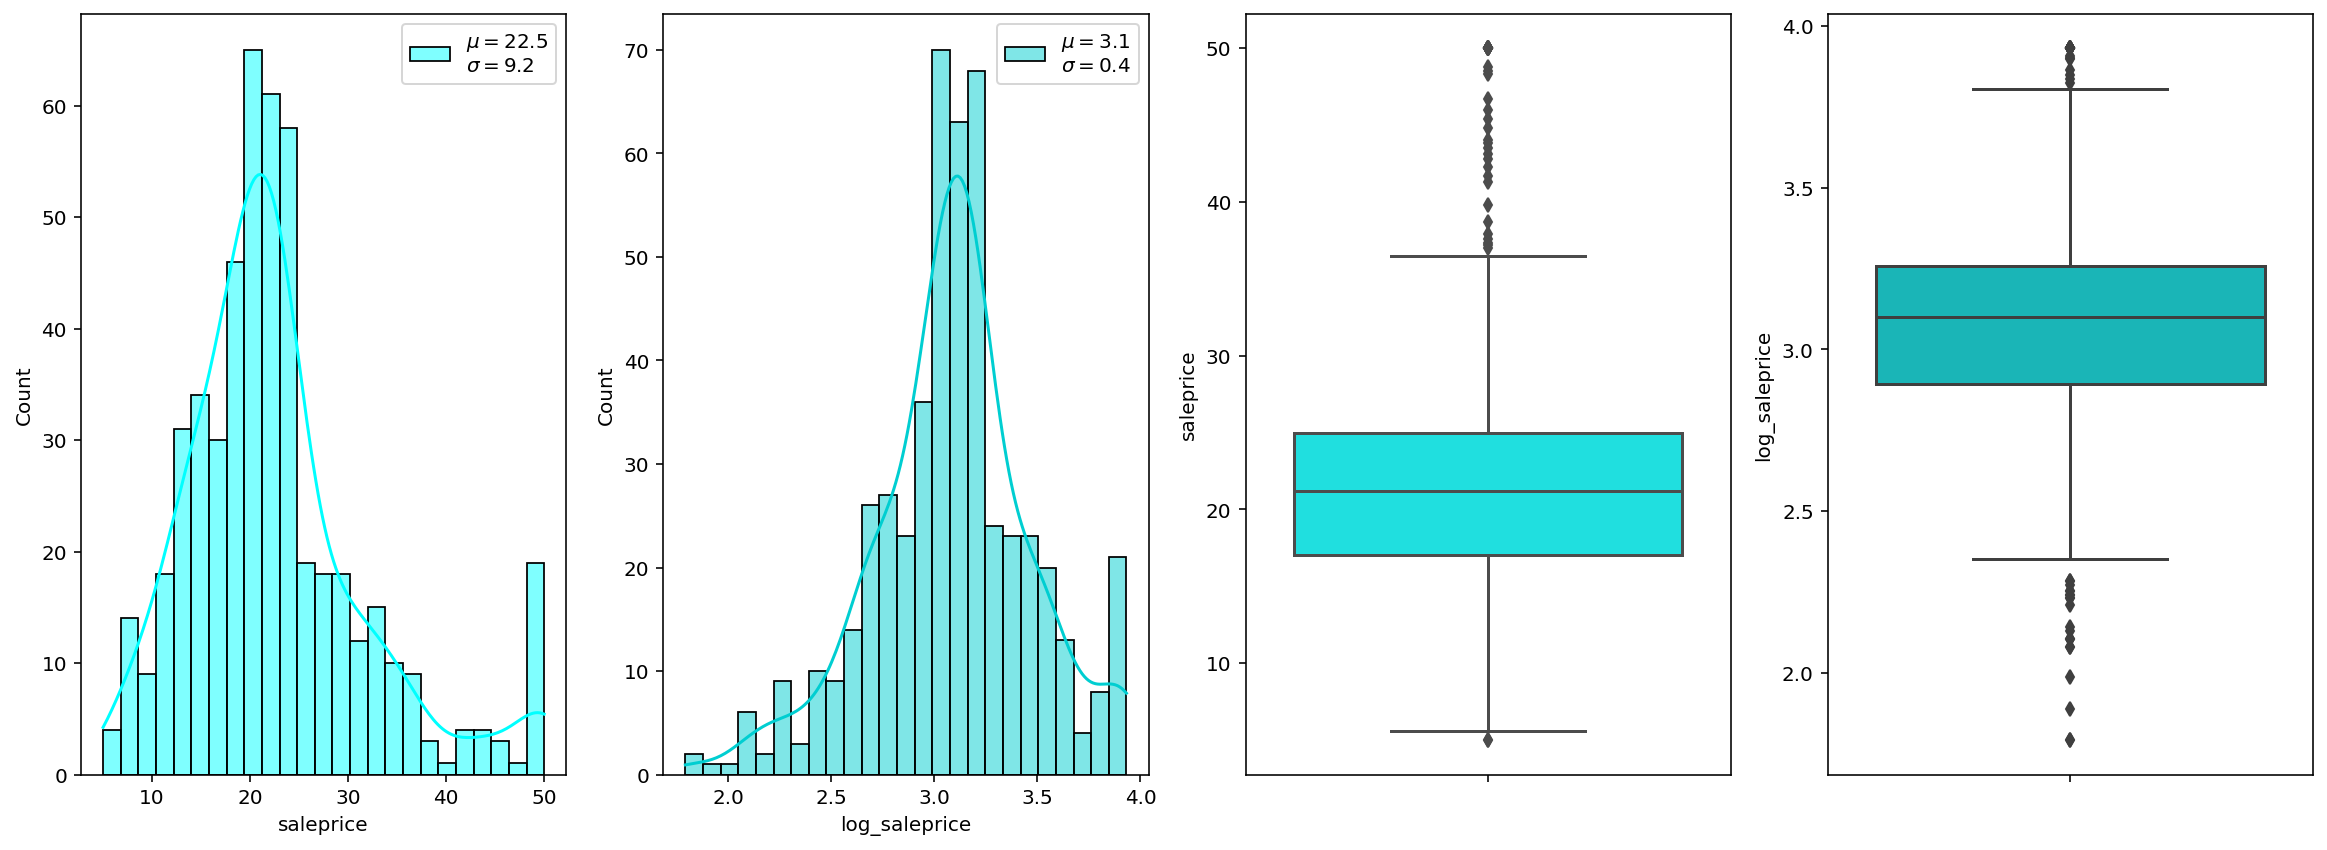

In [12]:
fig, ax = pl.subplots(1, 4, figsize=(20, 7))

mu, sigma = norm.fit(df["saleprice"])
sns.histplot(df["saleprice"],
             color=colors[-1],
             kde=True,
             bins=25,
             ax=ax[0],
             label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
ax[0].legend()

mu, sigma = norm.fit(df["log_saleprice"])
sns.histplot(df["log_saleprice"],
             color='darkturquoise',
             kde=True,
             bins=25,
             ax=ax[1],
             label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
ax[1].legend()

sns.boxplot(y="saleprice", data=df, color=colors[-1], ax=ax[2])
sns.boxplot(y="log_saleprice", data=df, color='darkturquoise', ax=ax[3])
pl.show()

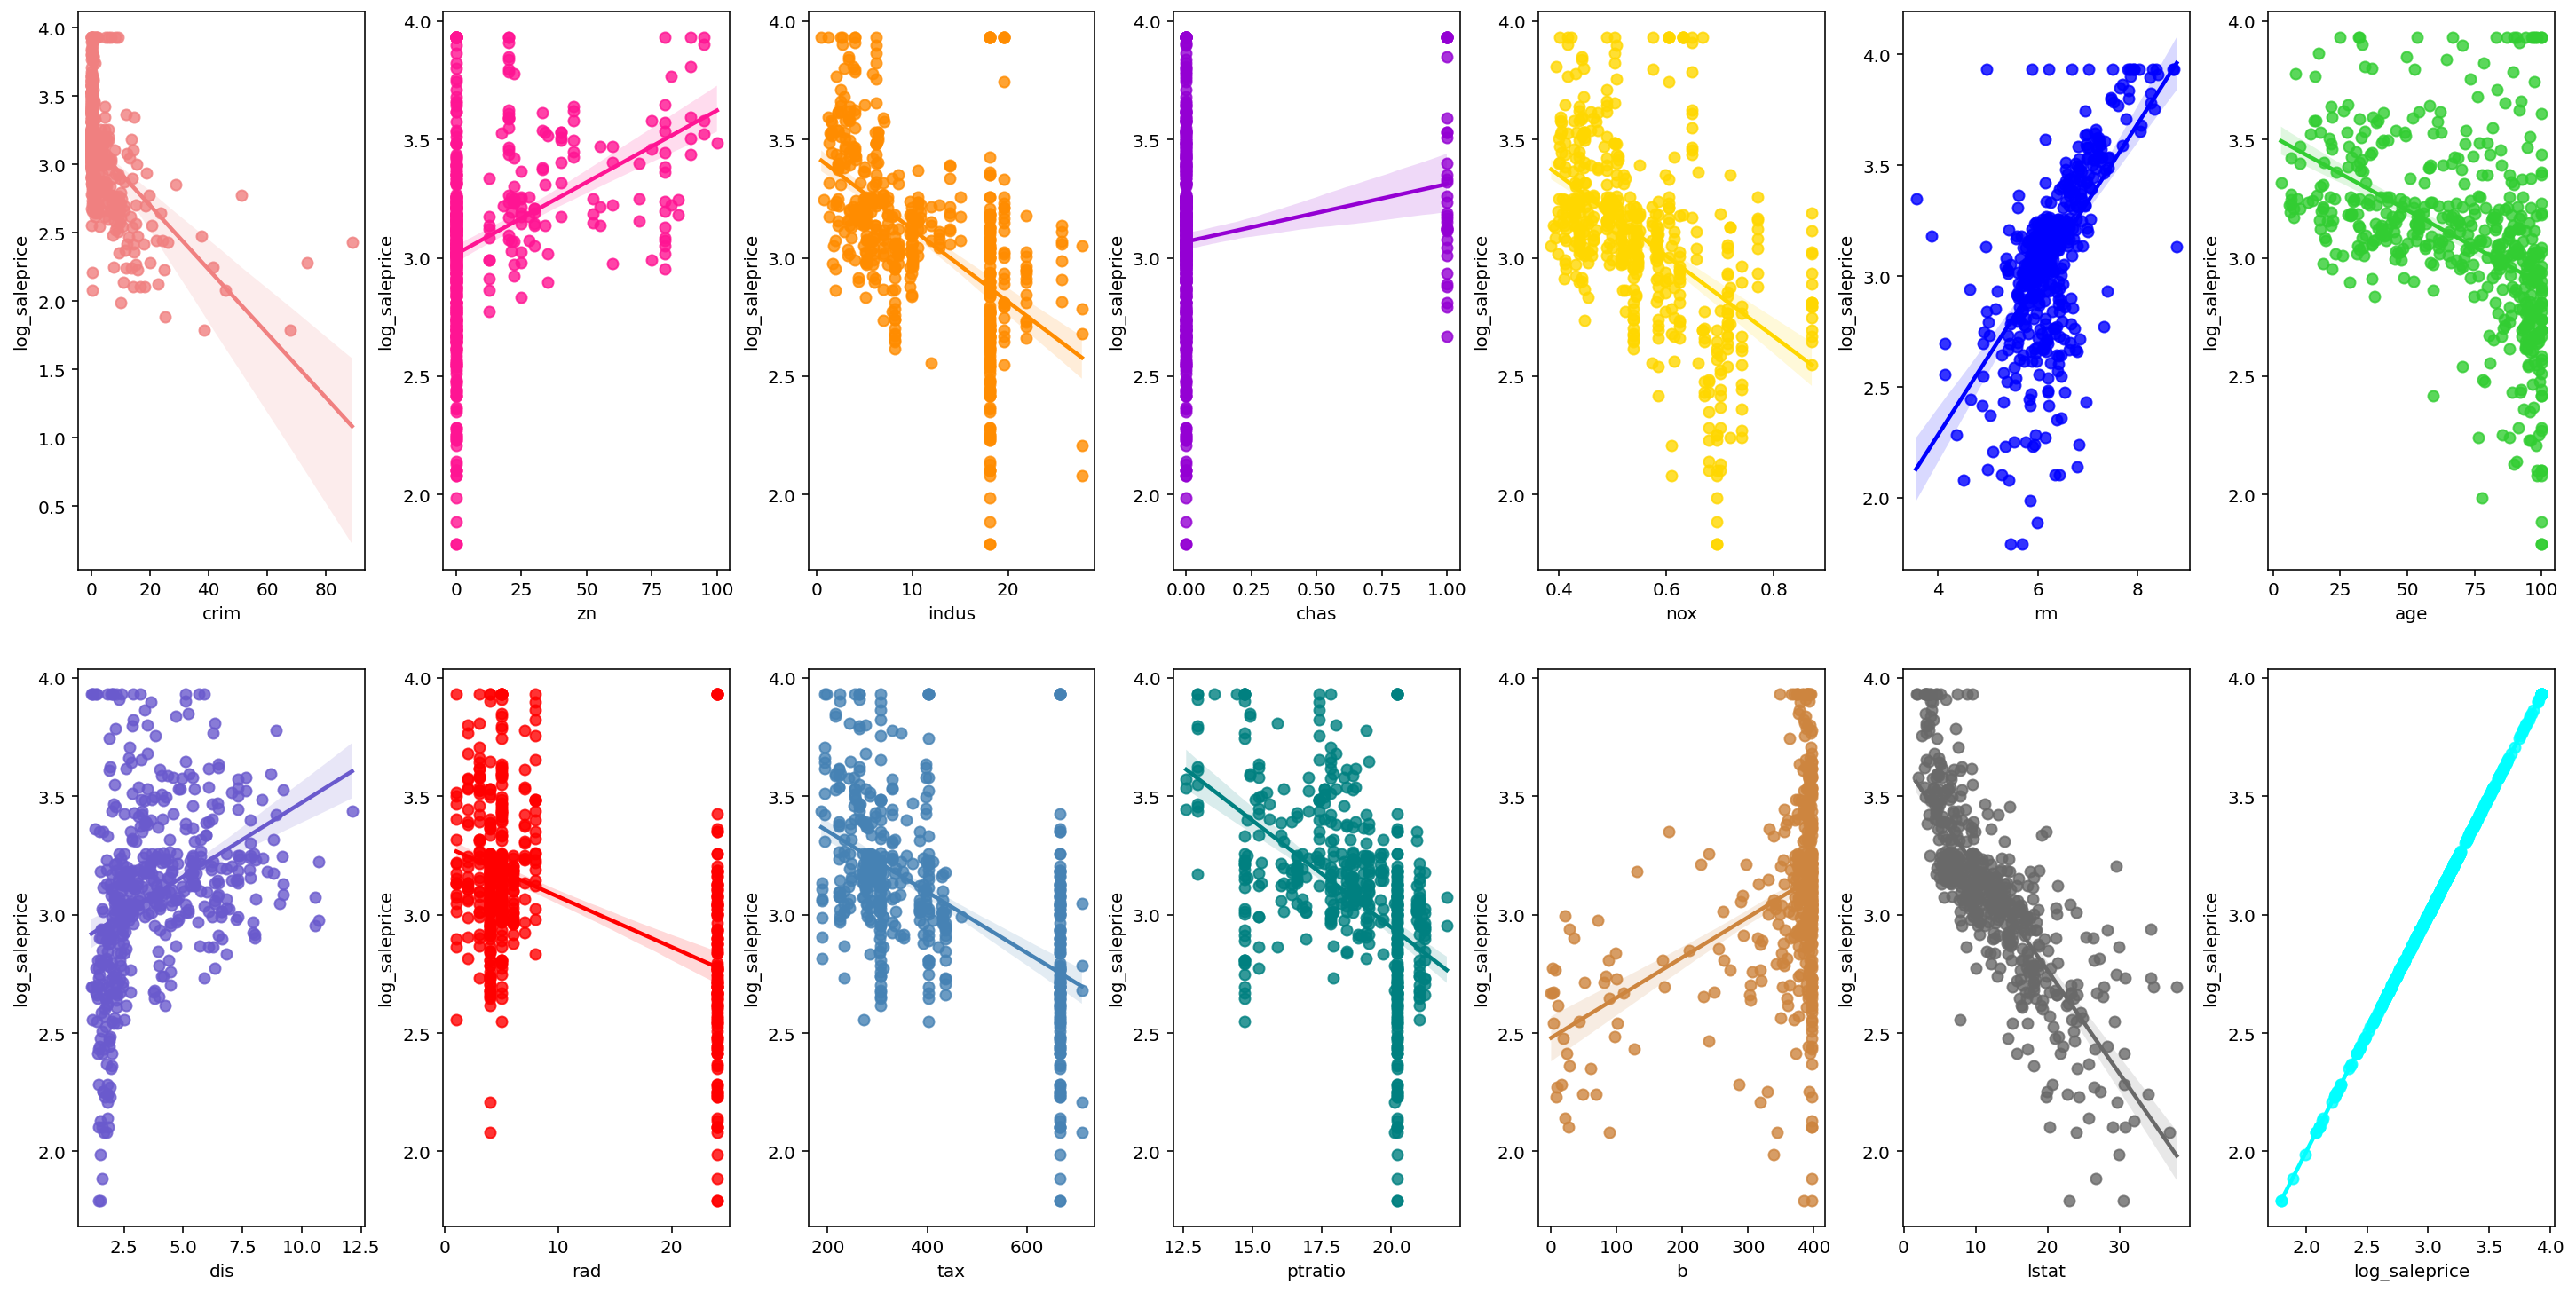

In [13]:
fig, ax = pl.subplots(ncols=7, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for col, _ in df.drop('saleprice', axis=1).items():
    sns.regplot(y=df['log_saleprice'], x=df[col], ax=ax[i], color=colors[i])
    i += 1
    
pl.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)

## 3.8 Normality Distribution Comparison

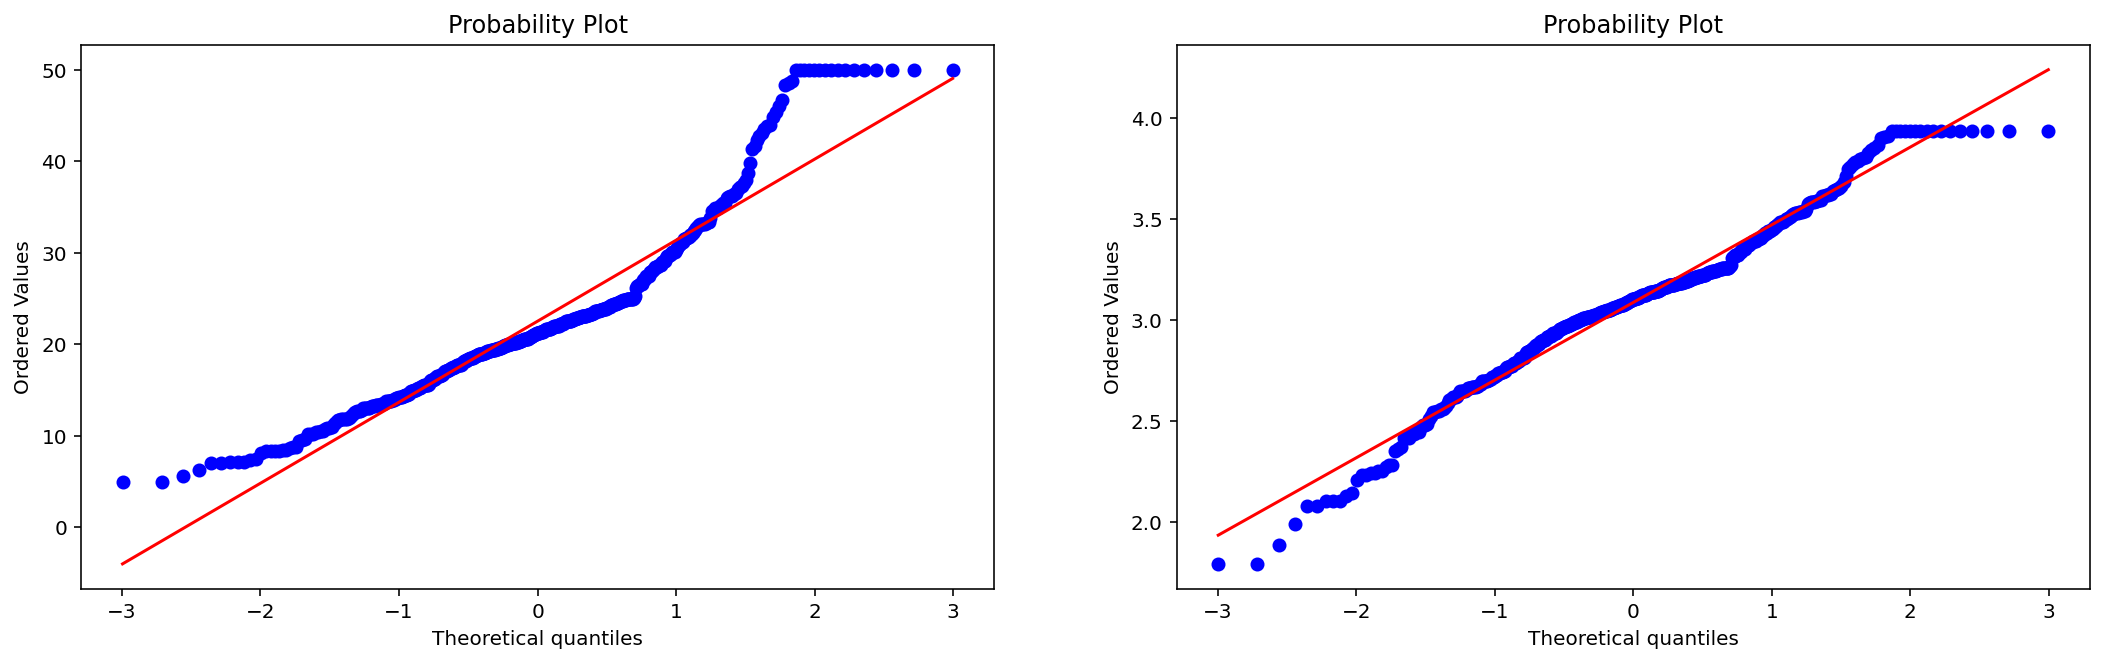

Skewness Data: 1.108
Kurtosis Data: 1.495
Skewness Transformed Data: -0.241
Kurtosis Transformed Data: 0.674


In [14]:
# QQ-plot
fig, ax = pl.subplots(1, 2, figsize=(18,5))
stats.probplot(df['saleprice'], plot=ax[0])
stats.probplot(df['log_saleprice'], plot=ax[1])
pl.show()


print(f'Skewness Data: {df.saleprice.skew():.3f}')
print(f'Kurtosis Data: {df.saleprice.kurt():.3f}')
print(f'Skewness Transformed Data: {df.log_saleprice.skew():.3f}')
print(f'Kurtosis Transformed Data: {df.log_saleprice.kurt():.3f}')

## 3.9 Data Correlation
    Looking for multicolinarity between predictor variables and variables with stronger correlation to log_saleprice

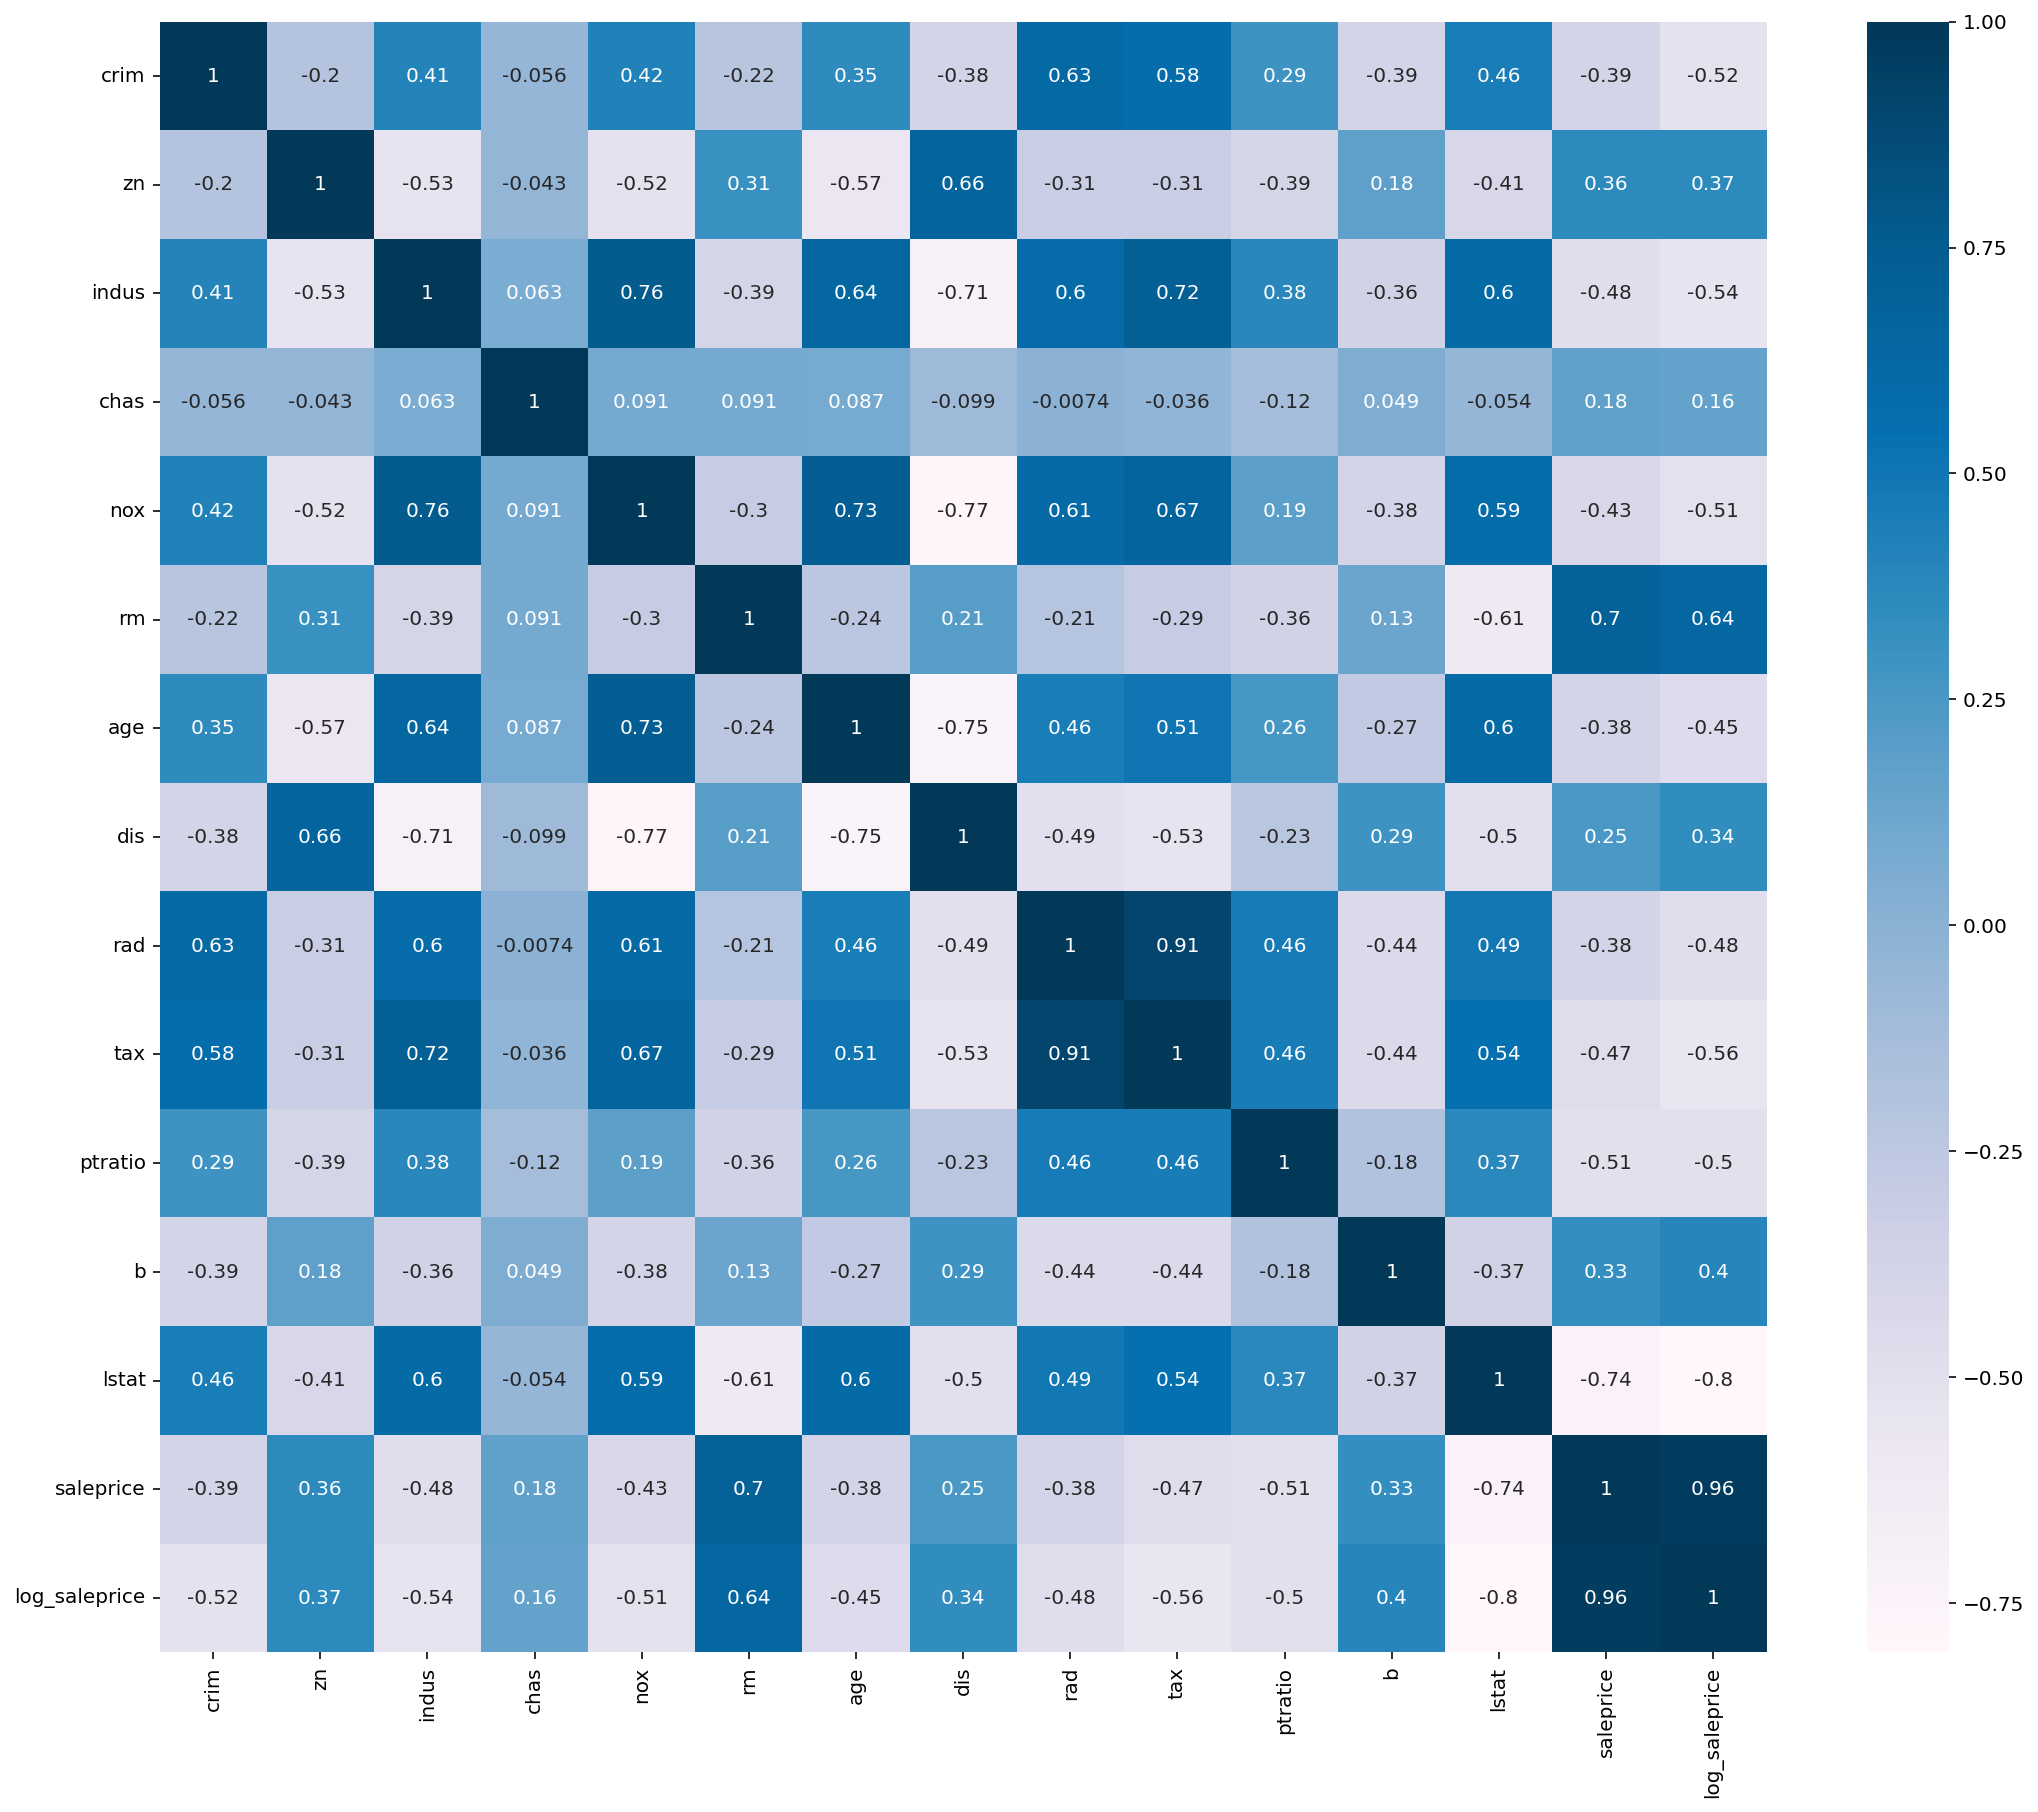

In [15]:
pl.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap=pl.cm.PuBu)
pl.show()

In [16]:
cor_target = abs(df.corr()["saleprice"])
print(cor_target)

relevant_features = cor_target[cor_target > 0.3]                  # highly corr columns 
names = [index for index, value in relevant_features.iteritems()] # names of columns 

names.remove('saleprice')
names.remove('log_saleprice')
print('–––'*12)
print(names)

crim             0.388305
zn               0.360445
indus            0.483725
chas             0.175260
nox              0.427321
rm               0.695360
age              0.376955
dis              0.249929
rad              0.381626
tax              0.468536
ptratio          0.507787
b                0.333461
lstat            0.737663
saleprice        1.000000
log_saleprice    0.958221
Name: saleprice, dtype: float64
––––––––––––––––––––––––––––––––––––
['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'b', 'lstat']


***
<a name='MB'>

# 4. Building Linear Model

## 4.1 Splitting Data to Training and Testing samples

In [17]:
# Splitting data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

Shapes - X Training: (354, 13) and X Testing (152, 13)
Shapes - Y Training: (354,) and Y Testing (152,)


## 4.2 Training Linear Regression Model and Getting Model's Coefficients

In [18]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)
pd.DataFrame(zip(X.columns, lr.coef_), columns=['Coefficients', 'Value'])

Coefficients      Value
0          crim  -0.133470
1            zn   0.035809
2         indus   0.049523
3          chas   3.119835
4           nox -15.417061
5            rm   4.057199
6           age  -0.010821
7           dis  -1.385998
8           rad   0.242727
9           tax  -0.008702
10      ptratio  -0.910685
11            b   0.011794
12        lstat  -0.547113

### 4.2.1 Analyzing Model's Performance

In [19]:
pred = lr.predict(X_test)  

for y, f in zip(y_test[:10], pred[:10]):
    diff = abs(y - f)
    print(f'Sale Price Value: {y:.1f} | Model Sale Price: {f:.1f} | Difference: {diff:.2f}')

Sale Price Value: 23.6 | Model Sale Price: 28.6 | Difference: 5.05
Sale Price Value: 32.4 | Model Sale Price: 36.5 | Difference: 4.10
Sale Price Value: 13.6 | Model Sale Price: 15.4 | Difference: 1.81
Sale Price Value: 22.8 | Model Sale Price: 25.4 | Difference: 2.60
Sale Price Value: 16.1 | Model Sale Price: 18.9 | Difference: 2.76
Sale Price Value: 20.0 | Model Sale Price: 23.1 | Difference: 3.15
Sale Price Value: 17.8 | Model Sale Price: 17.4 | Difference: 0.41
Sale Price Value: 14.0 | Model Sale Price: 14.1 | Difference: 0.08
Sale Price Value: 19.6 | Model Sale Price: 23.0 | Difference: 3.44
Sale Price Value: 16.8 | Model Sale Price: 20.6 | Difference: 3.80


In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred) 
print(f'RMSE of linear model = {np.sqrt(mse):.2f}')

RMSE of linear model = 4.64


***
<a name='LM'>
    
# 5. Transformed Linear Model - Logarithmic
    
Here we are fitting the log of the data,
$$\log(y_i) = \mathbf{X}\vec{\beta}$$
    
So we must remember that to get price we need to transfer back by taking the inverse of log: Mathematically,
    
$$y = \exp\left(\log(y)\right) =  \exp\left(\mathbf{X}\vec{\beta}\right)$$
    
## 5.1 Splitting Transfomed Data to Training and Testing samples

In [21]:
# creating log for comparison, # to trainsform back -> np.expm1(Y)
y_log = df.log_saleprice
X_train, X_test, log_y_train, log_y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

## 5.2 Training Transformed Linear Regression Model and Getting Model's Coefficients

In [22]:
from sklearn.linear_model import LinearRegression 

logr = LinearRegression() 
logr.fit(X_train, log_y_train)
pd.DataFrame(zip(X.columns, logr.coef_), columns=['Coefficients', 'Value'])

Coefficients     Value
0          crim -0.009956
1            zn  0.000919
2         indus  0.002809
3          chas  0.097416
4           nox -0.618874
5            rm  0.097033
6           age -0.000243
7           dis -0.044296
8           rad  0.010284
9           tax -0.000427
10      ptratio -0.034293
11            b  0.000556
12        lstat -0.028296

### 5.2.1 Analyzing Model's Performance

In [23]:
pred_log = logr.predict(X_test)  

for y, f in zip(log_y_test[:10], pred_log[:10]):
    diff = abs(y - f)
    print(f'Sale Price Value: {y:.1f} | Model Sale Price: {f:.1f} | Difference: {diff:.2f}')

Sale Price Value: 3.2 | Model Sale Price: 3.4 | Difference: 0.16
Sale Price Value: 3.5 | Model Sale Price: 3.7 | Difference: 0.14
Sale Price Value: 2.7 | Model Sale Price: 2.8 | Difference: 0.11
Sale Price Value: 3.2 | Model Sale Price: 3.3 | Difference: 0.13
Sale Price Value: 2.8 | Model Sale Price: 2.9 | Difference: 0.06
Sale Price Value: 3.0 | Model Sale Price: 3.1 | Difference: 0.10
Sale Price Value: 2.9 | Model Sale Price: 2.9 | Difference: 0.03
Sale Price Value: 2.7 | Model Sale Price: 2.7 | Difference: 0.01
Sale Price Value: 3.0 | Model Sale Price: 3.1 | Difference: 0.09
Sale Price Value: 2.9 | Model Sale Price: 3.0 | Difference: 0.15


In [24]:
# RMSE in log form
mse0 = mean_squared_error(log_y_test, pred_log) 
print(f'RMSE of log model = {np.sqrt(mse0):.2f}')

RMSE of log model = 0.18


In [25]:
# transforming back to sale price units
pred_back = np.expm1( pred_log )

mse_back = mean_squared_error(y_test, pred_back) 
print(f'RMSE of un-transformed model = {np.sqrt(mse_back):.2f}')

RMSE of un-transformed model = 4.07


***
<a name='CM'>

# 6. Comparison on Test Data
Here we see the transformed improved the model.

In [26]:
resid = y_test - pred
sse_lr = sum(resid**2)

resid_back = y_test - pred_back
sse_back = sum(resid_back**2)

print('–––'*15)
print(f'SSE of Linear model = {sse_lr:.2f}')
print(f'RMSE of linear model = {np.sqrt(mse):.2f}')
print('–––'*15)
print(f'SSE of un-transformed Log model = {sse_back:.2f}')
print(f'RMSE of un-transformed model = {np.sqrt(mse_back):.2f}')
print('–––'*15)

–––––––––––––––––––––––––––––––––––––––––––––
SSE of Linear model = 3270.65
RMSE of linear model = 4.64
–––––––––––––––––––––––––––––––––––––––––––––
SSE of un-transformed Log model = 2519.64
RMSE of un-transformed model = 4.07
–––––––––––––––––––––––––––––––––––––––––––––


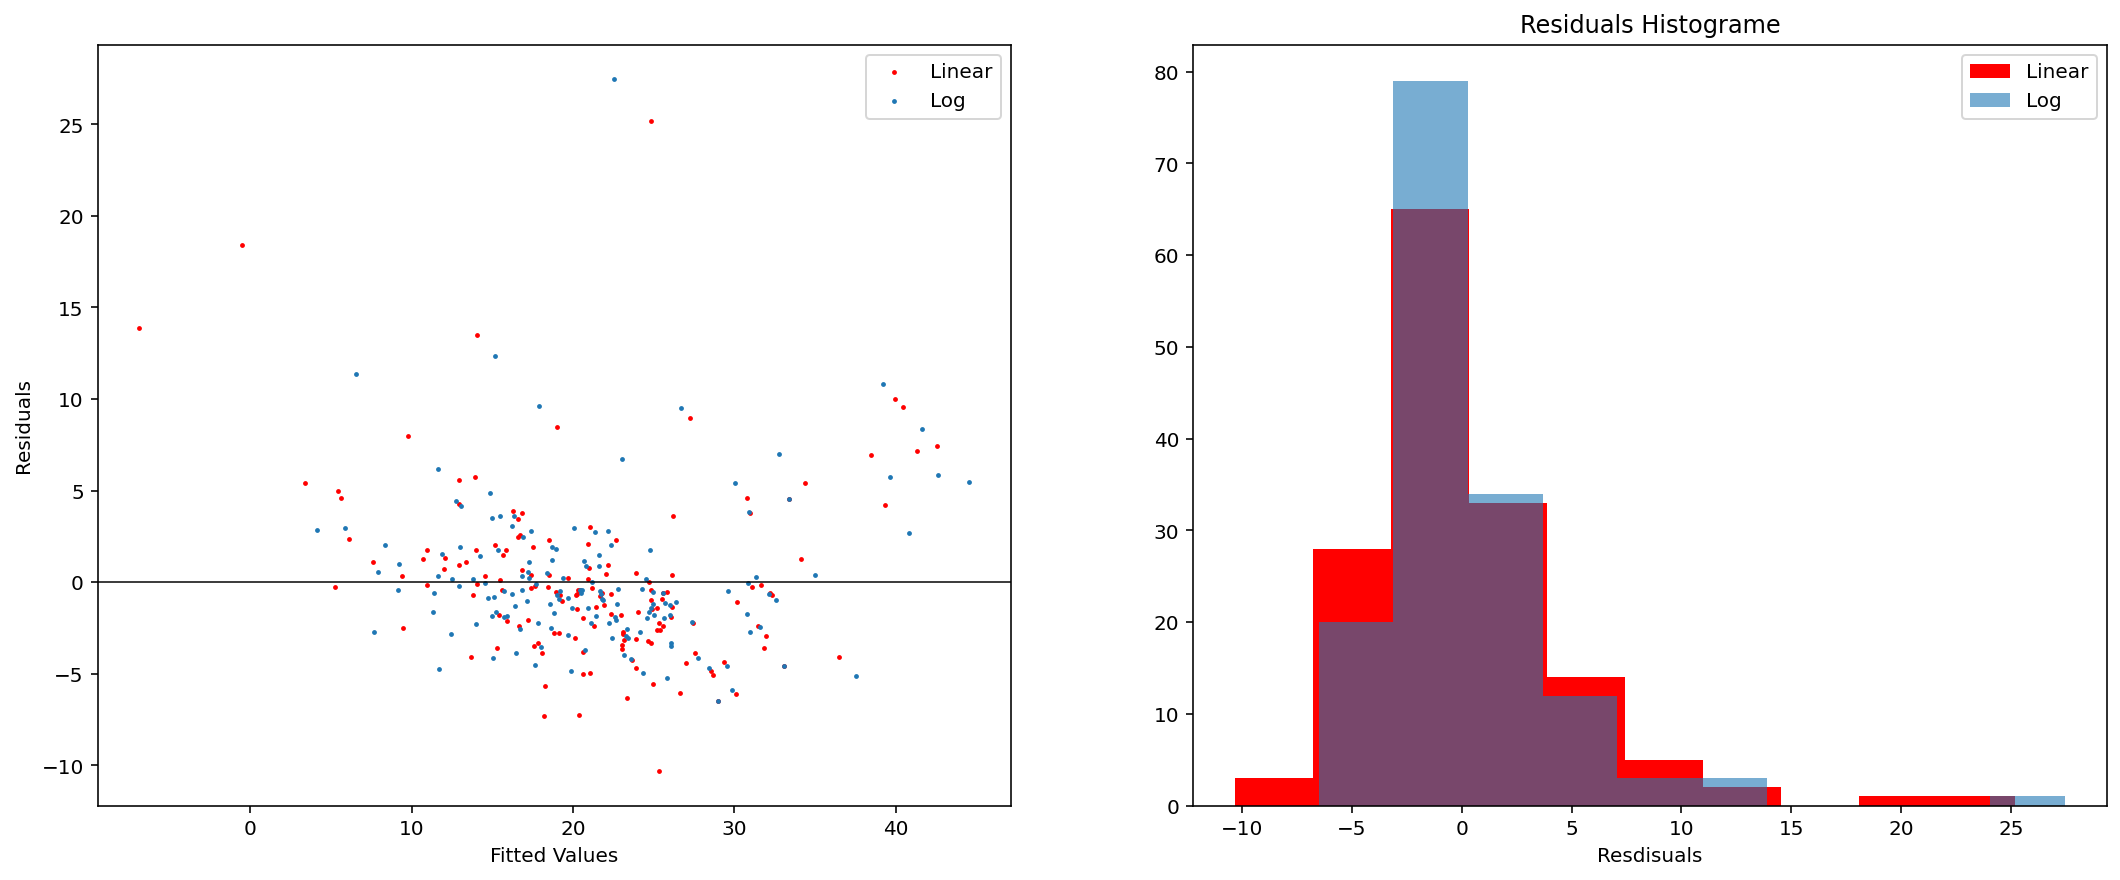

In [27]:
fig, ax = pl.subplots(1, 2, figsize=(18,7))

# Residuals vs Fitted
ax[0].scatter(pred, resid, s=2, color='red', label='Linear')
ax[0].scatter(pred_back, resid_back, s=2, label='Log')
ax[0].axhline(0, color='black', linewidth=0.75)
ax[0].set_xlabel("Fitted Values")
ax[0].set_ylabel("Residuals")
ax[0].legend()

# Histogram of residuals
ax[1].hist(resid, color='red', label='Linear')
ax[1].hist(resid_back, label='Log', alpha=0.6)
ax[1].set_title('Residuals Histograme')
ax[1].set_xlabel("Resdisuals")
ax[1].legend()
pl.show()

***
# 7 Fitting Whole Data Using Transformed Data <a name='TF'>
    
Since the log model slightly out performed the Linear model we will now fit the entire data to the log model.

In [28]:
from statsmodels.formula.api import ols

model = 'log_saleprice ~' 
for col in X.columns:
    model += ' + ' + col
print(model)

log_saleprice ~ + crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat


In [29]:
m = ols(model, data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_saleprice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          2.19e-157
Time:                        19:36:50   Log-Likelihood:                 157.98
No. Observations:                 506   AIC:                            -288.0
Df Residuals:                     492   BIC:                            -228.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0801      0.193     21.125      0.000       3.701       4.460
crim          -0.0093      0.001     -7.512      0.000      -0.012      -0.007
zn             0.0012      0.001      2.224      0.027       0.000       0.002
indus          0.0022      0.002      0.957      0.339      -0.002       0.007
chas           0.0966      0.033      2.963      0.003       0.033       0.161
nox           -0.7422      0.145     -5.134      0.000      -1.026      -0.458
rm             0.0902      0.016      5.701      0.000       0.059       0.121
age            0.0002      0.000      0.333      0.739      -0.001       0.001
dis           -0.0476      0.008     -6.302      0.000      -0.062      -0.033
rad            0.0135      0.003      5.372      0.000       0.009       0.018
tax           -0.0006      0.000     -4.147      0.000      -0.001      -0.000
ptratio       -0.0366      0.005     -7.399      0.000      -0.046      -0.027
b              0.0004      0.000      3.909      0.000       0.000       0.001
lstat         -0.0273      0.002    -14.200      0.000      -0.031      -0.023
==============================================================================
Omnibus:                       65.404   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.896
Skew:                           0.553   Prob(JB):                     3.26e-50
Kurtosis:                       6.096   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
Here we see rather large values p-values, thus we will remove some predictors with `high P-values`. Lets remove them and check on our VIF measurement.
#### VIF, Testing for Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Dropping columns with high P-value and looking at VIF
x = add_constant(X)
x.drop('age', axis=1, inplace=True)
x.drop('indus', axis=1, inplace=True)

for i, col in enumerate(x.columns):
    print(f'{col:f<}\t: {variance_inflation_factor(x.values, i):.2f}')
    
del x

const	: 579.26
crim	: 1.79
zn	: 2.24
chas	: 1.06
nox	: 3.78
rm	: 1.83
dis	: 3.44
rad	: 6.86
tax	: 7.27
ptratio	: 1.76
b	: 1.34
lstat	: 2.58


In [31]:
# removed age, indus
model = 'log_saleprice ~ +\
         crim +\
         zn +\
         chas +\
         nox +\
         rm +\
         dis +\
         rad +\
         tax +\
         ptratio +\
         b +\
         lstat'

m = ols(model, data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_saleprice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     168.7
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          2.16e-159
Time:                        19:36:51   Log-Likelihood:                 157.45
No. Observations:                 506   AIC:                            -290.9
Df Residuals:                     494   BIC:                            -240.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0643      0.192     21.173      0.000       3.687       4.441
crim          -0.0094      0.001     -7.559      0.000      -0.012      -0.007
zn             0.0011      0.001      2.112      0.035    7.53e-05       0.002
chas           0.1004      0.032      3.102      0.002       0.037       0.164
nox           -0.6928      0.134     -5.174      0.000      -0.956      -0.430
rm             0.0899      0.015      5.839      0.000       0.060       0.120
dis           -0.0498      0.007     -7.083      0.000      -0.064      -0.036
rad            0.0128      0.002      5.311      0.000       0.008       0.017
tax           -0.0005      0.000     -4.142      0.000      -0.001      -0.000
ptratio       -0.0359      0.005     -7.341      0.000      -0.045      -0.026
b              0.0004      0.000      3.912      0.000       0.000       0.001
lstat         -0.0269      0.002    -14.972      0.000      -0.030      -0.023
==============================================================================
Omnibus:                       64.996   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.707
Skew:                           0.547   Prob(JB):                     3.58e-50
Kurtosis:                       6.099   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
End of analysis <a name='bottom'>
    
### Sections:
[`Top of Notebook`](#TOP)<br>
[`1. Boston Housing Prices Dataset`](#DM)<br>
[`2. Impoting Data and Initial Data Analysis`](#IDIDA)<br>
[`3. Data Visualization`](#VA)<br>
[`4. Linear Model`](#MB)<br>
[`5. Transformed Linear Model - Logarithmic`](#LM)<br>
[`6. Comparing Models`](#CM)<br>
[`7. Total Fit of Better Model`](#TF)<br>
    
By [Math & physics Fun with Gus](https://mathphysicsfunwithgus.square.site)
***